In [1]:
import numpy as np
import pandas as pd
import os
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
shap.initjs()
from sklearn.preprocessing import StandardScaler
#mean squared
from sklearn.metrics import mean_squared_error

data2012 = pd.read_csv('/home/peter/Documents/DSProject/finalData2012.csv')
data2013 = pd.read_csv('/home/peter/Documents/DSProject/finalData2013.csv')
data2014 = pd.read_csv('/home/peter/Documents/DSProject/finalData2014.csv')

In [2]:
Uta12 = data2012['State'] == 'Utah'
Utah12 = data2012[Uta12]
######################## Daily Seperation
Utah12 = Utah12.groupby('Date Local').mean().reset_index()
UtahDaily2012 = Utah12

Ore12 = data2012['State'] == 'Oregon'
Oregon12 = data2012[Ore12]
######################## Daily Seperation
Oregon12 = Oregon12.groupby('Date Local').mean().reset_index()
OregonDaily2012 = Oregon12

Nev12 = data2012['State'] == 'Nevada'
Nevada12 = data2012[Nev12]
######################## Daily Seperation
Nevada12 = Nevada12.groupby('Date Local').mean().reset_index()
NevadaDaily2012 = Nevada12

Flo12 = data2012['State'] == 'Florida'
Florida12 = data2012[Flo12]#
######################## Daily Seperation
Florida12 = Florida12.groupby('Date Local').mean().reset_index()
FloridaDaily2012 = Florida12

OH12 = data2012['State'] == 'Ohio'
Ohio12 = data2012[OH12]
######################## Daily Seperation
Ohio12 = Ohio12.groupby('Date Local').mean().reset_index()
OhioDaily2012 = Ohio12

Vir12 = data2012['State'] == 'Virginia'
Virginia12 = data2012[Vir12]
######################## Daily Seperation
Virginia12 = Virginia12.groupby('Date Local').mean().reset_index()
VirginiaDaily2012 = Virginia12

Pen12 = data2012['State'] == 'Pennsylvania'
Pennsylvania12 = data2012[Pen12]
######################## Daily Seperation
Pennsylvania12 = Pennsylvania12.groupby('Date Local').mean().reset_index()
PennsylvaniaDaily2012 = Pennsylvania12

Mas12 = data2012['State'] == 'Massachusetts'
Massachusetts12 = data2012[Mas12]
######################## Daily Seperation
Massachusetts12 = Massachusetts12.groupby('Date Local').mean().reset_index()
MassachusettsDaily2012 = Massachusetts12

Mai12 = data2012['State'] == 'Maine'
Maine12 = data2012[Mai12]
######################## Daily Seperation
Maine12 = Maine12.groupby('Date Local').mean().reset_index()
MaineDaily2012 = Maine12

Tex12 = data2012['State'] == 'Texas'
Texas12 = data2012[Tex12]
######################## Daily Seperation
Texas12 = Texas12.groupby('Date Local').mean().reset_index()
TexasDaily2012 = Texas12

Lou12 = data2012['State'] == 'Louisiana'
Louisiana12 = data2012[Lou12]
######################## Daily Seperation
Louisiana12 = Louisiana12.groupby('Date Local').mean().reset_index()
LouisianaDaily2012 = Louisiana12

Kan12 = data2012['State'] == 'Kansas'
Kansas12 = data2012[Kan12]
######################## Daily Seperation
Kansas12 = Kansas12.groupby('Date Local').mean().reset_index()
KansasDaily2012 = Kansas12

Nk12 = data2012['State'] == 'North Dakota'
NorthDakota12 = data2012[Nk12]
######################## Daily Seperation
NorthDakota12 = NorthDakota12.groupby('Date Local').mean().reset_index()
NorthDakotaDaily2012 = NorthDakota12

Wyo12 = data2012['State'] == 'Wyoming'
Wyoming12 = data2012[Wyo12]
######################## Daily Seperation
Wyoming12 = Wyoming12.groupby('Date Local').mean().reset_index()
WyomingDaily2012 = Wyoming12

Geo12 = data2012['State'] == 'Georgia'
Georgia12 = data2012[Geo12]
######################## Daily Seperation
Georgia12 = Georgia12.groupby('Date Local').mean().reset_index()
GeorgiaDaily2012 = Georgia12

Ill12 = data2012['State'] == 'Illinois'
Illinois12 = data2012[Ill12]
######################## Daily Seperation
Illinois12 = Illinois12.groupby('Date Local').mean().reset_index()
IllinoisDaily2012 = Illinois12

In [3]:
Ore12 = data2012['State'] == 'Oregon'
Oregon12 = data2012[Ore12]
######################## Monthly Seperation
Oregon12['Date Local'] =  pd.to_datetime(Oregon12['Date Local'])
Oregon12.set_index('Date Local', inplace=True)
Oregon12.index = pd.to_datetime(Oregon12.index)
OregonMonthly2012=Oregon12.resample('1M').mean().reset_index()

Nev12 = data2012['State'] == 'Nevada'
Nevada12 = data2012[Nev12]
######################## Monthly Seperation
Nevada12['Date Local'] =  pd.to_datetime(Nevada12['Date Local'])
Nevada12.set_index('Date Local', inplace=True)
Nevada12.index = pd.to_datetime(Nevada12.index)
NevadaMonthly2012=Nevada12.resample('1M').mean().reset_index()

Flo12 = data2012['State'] == 'Florida'
Florida12 = data2012[Flo12]
######################## Monthly Seperation
Florida12['Date Local'] =  pd.to_datetime(Florida12['Date Local'])
Florida12.set_index('Date Local', inplace=True)
Florida12.index = pd.to_datetime(Florida12.index)
FloridaMonthly2012=Florida12.resample('1M').mean().reset_index()

Vir12 = data2012['State'] == 'Virginia'
Virginia12 = data2012[Vir12]
######################## Monthly Seperation
Virginia12['Date Local'] =  pd.to_datetime(Virginia12['Date Local'])
Virginia12.set_index('Date Local', inplace=True)
Virginia12.index = pd.to_datetime(Virginia12.index)
VirginiaMonthly2012=Virginia12.resample('1M').mean().reset_index()

Pen12 = data2012['State'] == 'Pennsylvania'
Pennsylvania12 = data2012[Pen12]
######################## Monthly Seperation
Pennsylvania12['Date Local'] =  pd.to_datetime(Pennsylvania12['Date Local'])
Pennsylvania12.set_index('Date Local', inplace=True)
Pennsylvania12.index = pd.to_datetime(Pennsylvania12.index)
PennsylvaniaMonthly2012=Pennsylvania12.resample('1M').mean().reset_index()

Mas12 = data2012['State'] == 'Massachusetts'
Massachusetts12 = data2012[Mas12]
######################## Monthly Seperation
Massachusetts12['Date Local'] =  pd.to_datetime(Massachusetts12['Date Local'])
Massachusetts12.set_index('Date Local', inplace=True)
Massachusetts12.index = pd.to_datetime(Massachusetts12.index)
MassachusettsMonthly2012=Massachusetts12.resample('1M').mean().reset_index()

Mai12 = data2012['State'] == 'Maine'
Maine12 = data2012[Mai12]
######################## Monthly Seperation
Maine12['Date Local'] =  pd.to_datetime(Maine12['Date Local'])
Maine12.set_index('Date Local', inplace=True)
Maine12.index = pd.to_datetime(Maine12.index)
MaineMonthly2012=Maine12.resample('1M').mean().reset_index()

Tex12 = data2012['State'] == 'Texas'
Texas12 = data2012[Tex12]
######################## Monthly Seperation
Texas12['Date Local'] =  pd.to_datetime(Texas12['Date Local'])
Texas12.set_index('Date Local', inplace=True)
Texas12.index = pd.to_datetime(Texas12.index)
TexasMonthly2012=Texas12.resample('1M').mean().reset_index()

Lou12 = data2012['State'] == 'Louisiana'
Louisiana12 = data2012[Lou12]
######################## Monthly Seperation
Louisiana12['Date Local'] =  pd.to_datetime(Louisiana12['Date Local'])
Louisiana12.set_index('Date Local', inplace=True)
Louisiana12.index = pd.to_datetime(Louisiana12.index)
LouisianaMonthly2012=Louisiana12.resample('1M').mean().reset_index()

Kan12 = data2012['State'] == 'Kansas'
Kansas12 = data2012[Kan12]
######################## Monthly Seperation
Kansas12['Date Local'] =  pd.to_datetime(Kansas12['Date Local'])
Kansas12.set_index('Date Local', inplace=True)
Kansas12.index = pd.to_datetime(Kansas12.index)
KansasMonthly2012=Kansas12.resample('1M').mean().reset_index()

Nk12 = data2012['State'] == 'North Dakota'
NorthDakota12 = data2012[Nk12]
######################## Monthly Seperation
NorthDakota12['Date Local'] =  pd.to_datetime(NorthDakota12['Date Local'])
NorthDakota12.set_index('Date Local', inplace=True)
NorthDakota12.index = pd.to_datetime(NorthDakota12.index)
NorthDakotaMonthly2012=Kansas12.resample('1M').mean().reset_index()

Wyo12 = data2012['State'] == 'Wyoming'
Wyoming12 = data2012[Wyo12]
######################## Monthly Seperation
Wyoming12['Date Local'] =  pd.to_datetime(Wyoming12['Date Local'])
Wyoming12.set_index('Date Local', inplace=True)
Wyoming12.index = pd.to_datetime(Wyoming12.index)
WyomingMonthly2012=Wyoming12.resample('1M').mean().reset_index()

Geo12 = data2012['State'] == 'Georgia'
Georgia12 = data2012[Geo12]
######################## Monthly Seperation
Georgia12['Date Local'] =  pd.to_datetime(Georgia12['Date Local'])
Georgia12.set_index('Date Local', inplace=True)
Georgia12.index = pd.to_datetime(Georgia12.index)
GeorgiaMonthly2012=Georgia12.resample('1M').mean().reset_index()

Ill12 = data2012['State'] == 'Illinois'
Illinois12 = data2012[Ill12]
######################## Monthly Seperation
Illinois12['Date Local'] =  pd.to_datetime(Illinois12['Date Local'])
Illinois12.set_index('Date Local', inplace=True)
Illinois12.index = pd.to_datetime(Illinois12.index)
IllinoisMonthly2012=Illinois12.resample('1M').mean().reset_index()

Uta12 = data2012['State'] == 'Utah'
Utah12 = data2012[Uta12]
######################## Monthly Seperation
Utah12['Date Local'] =  pd.to_datetime(Utah12['Date Local'])
Utah12.set_index('Date Local', inplace=True)
Utah12.index = pd.to_datetime(Utah12.index)
UtahMonthly2012=Utah12.resample('1M').mean().reset_index()

OH12 = data2012['State'] == 'Ohio'
Ohio12 = data2012[OH12]
######################## Monthly Seperation
Ohio12['Date Local'] =  pd.to_datetime(Ohio12['Date Local'])
Ohio12.set_index('Date Local', inplace=True)
Ohio12.index = pd.to_datetime(Ohio12.index)
OhioMonthly2012=Ohio12.resample('1M').mean().reset_index()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [4]:
Uta13 = data2013['State'] == 'Utah'
Utah13 = data2013[Uta13]
######################## Daily Seperation
Utah13 = Utah13.groupby('Date Local').mean().reset_index()
UtahDaily2013 = Utah13

Ore13 = data2013['State'] == 'Oregon'
Oregon13 = data2013[Ore13]
######################## Daily Seperation
Oregon13 = Oregon13.groupby('Date Local').mean().reset_index()
OregonDaily2013 = Oregon13

Nev13 = data2013['State'] == 'Nevada'
Nevada13 = data2013[Nev13]
######################## Daily Seperation
Nevada13 = Nevada13.groupby('Date Local').mean().reset_index()
NevadaDaily2013 = Nevada13

Flo13 = data2013['State'] == 'Florida'
Florida13 = data2013[Flo13]#
######################## Daily Seperation
Florida13 = Florida13.groupby('Date Local').mean().reset_index()
FloridaDaily2013 = Florida13

OH13 = data2013['State'] == 'Ohio'
Ohio13 = data2013[OH13]
######################## Daily Seperation
Ohio13 = Ohio13.groupby('Date Local').mean().reset_index()
OhioDaily2013 = Ohio13

Vir13 = data2013['State'] == 'Virginia'
Virginia13 = data2013[Vir13]
######################## Daily Seperation
Virginia13 = Virginia13.groupby('Date Local').mean().reset_index()
VirginiaDaily2013 = Virginia13

Pen13 = data2013['State'] == 'Pennsylvania'
Pennsylvania13 = data2013[Pen13]
######################## Daily Seperation
Pennsylvania13 = Pennsylvania13.groupby('Date Local').mean().reset_index()
PennsylvaniaDaily2013 = Pennsylvania13

Mas13 = data2013['State'] == 'Massachusetts'
Massachusetts13 = data2013[Mas13]
######################## Daily Seperation
Massachusetts13 = Massachusetts13.groupby('Date Local').mean().reset_index()
MassachusettsDaily2013 = Massachusetts13

Mai13 = data2013['State'] == 'Maine'
Maine13 = data2013[Mai13]
######################## Daily Seperation
Maine13 = Maine13.groupby('Date Local').mean().reset_index()
MaineDaily2013 = Maine13

Tex13 = data2013['State'] == 'Texas'
Texas13 = data2013[Tex13]
######################## Daily Seperation
Texas13 = Texas13.groupby('Date Local').mean().reset_index()
TexasDaily2013 = Texas13

Lou13 = data2013['State'] == 'Louisiana'
Louisiana13 = data2013[Lou13]
######################## Daily Seperation
Louisiana13 = Louisiana13.groupby('Date Local').mean().reset_index()
LouisianaDaily2013 = Louisiana13

Kan13 = data2013['State'] == 'Kansas'
Kansas13 = data2013[Kan13]
######################## Daily Seperation
Kansas13 = Kansas13.groupby('Date Local').mean().reset_index()
KansasDaily2013 = Kansas13

Nk13 = data2013['State'] == 'North Dakota'
NorthDakota13 = data2013[Nk13]
######################## Daily Seperation
NorthDakota13 = NorthDakota13.groupby('Date Local').mean().reset_index()
NorthDakotaDaily2013 = NorthDakota13

Wyo13 = data2013['State'] == 'Wyoming'
Wyoming13 = data2013[Wyo13]
######################## Daily Seperation
Wyoming13 = Wyoming13.groupby('Date Local').mean().reset_index()
WyomingDaily2013 = Wyoming13

Geo13 = data2013['State'] == 'Georgia'
Georgia13 = data2013[Geo13]
######################## Daily Seperation
Georgia13 = Georgia13.groupby('Date Local').mean().reset_index()
GeorgiaDaily2013 = Georgia13

Ill13 = data2013['State'] == 'Illinois'
Illinois13 = data2013[Ill13]
######################## Daily Seperation
Illinois13 = Illinois13.groupby('Date Local').mean().reset_index()
IllinoisDaily2013 = Illinois13

In [5]:
Ore13 = data2013['State'] == 'Oregon'
Oregon13 = data2013[Ore13]
######################## Monthly Seperation
Oregon13['Date Local'] =  pd.to_datetime(Oregon13['Date Local'])
Oregon13.set_index('Date Local', inplace=True)
Oregon13.index = pd.to_datetime(Oregon13.index)
OregonMonthly2013=Oregon13.resample('1M').mean().reset_index()

Nev13 = data2013['State'] == 'Nevada'
Nevada13 = data2013[Nev13]
######################## Monthly Seperation
Nevada13['Date Local'] =  pd.to_datetime(Nevada13['Date Local'])
Nevada13.set_index('Date Local', inplace=True)
Nevada13.index = pd.to_datetime(Nevada13.index)
NevadaMonthly2013=Nevada13.resample('1M').mean().reset_index()

Flo13 = data2013['State'] == 'Florida'
Florida13 = data2013[Flo13]
######################## Monthly Seperation
Florida13['Date Local'] =  pd.to_datetime(Florida13['Date Local'])
Florida13.set_index('Date Local', inplace=True)
Florida13.index = pd.to_datetime(Florida13.index)
FloridaMonthly2013=Florida13.resample('1M').mean().reset_index()

Vir13 = data2013['State'] == 'Virginia'
Virginia13 = data2013[Vir13]
######################## Monthly Seperation
Virginia13['Date Local'] =  pd.to_datetime(Virginia13['Date Local'])
Virginia13.set_index('Date Local', inplace=True)
Virginia13.index = pd.to_datetime(Virginia13.index)
VirginiaMonthly2013=Virginia13.resample('1M').mean().reset_index()

Pen13 = data2013['State'] == 'Pennsylvania'
Pennsylvania13 = data2013[Pen13]
######################## Monthly Seperation
Pennsylvania13['Date Local'] =  pd.to_datetime(Pennsylvania13['Date Local'])
Pennsylvania13.set_index('Date Local', inplace=True)
Pennsylvania13.index = pd.to_datetime(Pennsylvania13.index)
PennsylvaniaMonthly2013=Pennsylvania13.resample('1M').mean().reset_index()

Mas13 = data2013['State'] == 'Massachusetts'
Massachusetts13 = data2013[Mas13]
######################## Monthly Seperation
Massachusetts13['Date Local'] =  pd.to_datetime(Massachusetts13['Date Local'])
Massachusetts13.set_index('Date Local', inplace=True)
Massachusetts13.index = pd.to_datetime(Massachusetts13.index)
MassachusettsMonthly2013=Massachusetts13.resample('1M').mean().reset_index()

Mai13 = data2013['State'] == 'Maine'
Maine13 = data2013[Mai13]
######################## Monthly Seperation
Maine13['Date Local'] =  pd.to_datetime(Maine13['Date Local'])
Maine13.set_index('Date Local', inplace=True)
Maine13.index = pd.to_datetime(Maine13.index)
MaineMonthly2013=Maine13.resample('1M').mean().reset_index()

Tex13 = data2013['State'] == 'Texas'
Texas13 = data2013[Tex13]
######################## Monthly Seperation
Texas13['Date Local'] =  pd.to_datetime(Texas13['Date Local'])
Texas13.set_index('Date Local', inplace=True)
Texas13.index = pd.to_datetime(Texas13.index)
TexasMonthly2013=Texas13.resample('1M').mean().reset_index()

Lou13 = data2013['State'] == 'Louisiana'
Louisiana13 = data2013[Lou13]
######################## Monthly Seperation
Louisiana13['Date Local'] =  pd.to_datetime(Louisiana13['Date Local'])
Louisiana13.set_index('Date Local', inplace=True)
Louisiana13.index = pd.to_datetime(Louisiana13.index)
LouisianaMonthly2013=Louisiana13.resample('1M').mean().reset_index()

Kan13 = data2013['State'] == 'Kansas'
Kansas13 = data2013[Kan13]
######################## Monthly Seperation
Kansas13['Date Local'] =  pd.to_datetime(Kansas13['Date Local'])
Kansas13.set_index('Date Local', inplace=True)
Kansas13.index = pd.to_datetime(Kansas13.index)
KansasMonthly2013=Kansas13.resample('1M').mean().reset_index()

Nk13 = data2013['State'] == 'North Dakota'
NorthDakota13 = data2013[Nk13]
######################## Monthly Seperation
NorthDakota13['Date Local'] =  pd.to_datetime(NorthDakota13['Date Local'])
NorthDakota13.set_index('Date Local', inplace=True)
NorthDakota13.index = pd.to_datetime(NorthDakota13.index)
NorthDakotaMonthly2013=Kansas13.resample('1M').mean().reset_index()

Wyo13 = data2013['State'] == 'Wyoming'
Wyoming13 = data2013[Wyo13]
######################## Monthly Seperation
Wyoming13['Date Local'] =  pd.to_datetime(Wyoming13['Date Local'])
Wyoming13.set_index('Date Local', inplace=True)
Wyoming13.index = pd.to_datetime(Wyoming13.index)
WyomingMonthly2013=Wyoming13.resample('1M').mean().reset_index()

Geo13 = data2013['State'] == 'Georgia'
Georgia13 = data2013[Geo13]
######################## Monthly Seperation
Georgia13['Date Local'] =  pd.to_datetime(Georgia13['Date Local'])
Georgia13.set_index('Date Local', inplace=True)
Georgia13.index = pd.to_datetime(Georgia13.index)
GeorgiaMonthly2013=Georgia13.resample('1M').mean().reset_index()

Ill13 = data2013['State'] == 'Illinois'
Illinois13 = data2013[Ill13]
######################## Monthly Seperation
Illinois13['Date Local'] =  pd.to_datetime(Illinois13['Date Local'])
Illinois13.set_index('Date Local', inplace=True)
Illinois13.index = pd.to_datetime(Illinois13.index)
IllinoisMonthly2013=Illinois13.resample('1M').mean().reset_index()

Uta13 = data2013['State'] == 'Utah'
Utah13 = data2013[Uta13]
######################## Monthly Seperation
Utah13['Date Local'] =  pd.to_datetime(Utah13['Date Local'])
Utah13.set_index('Date Local', inplace=True)
Utah13.index = pd.to_datetime(Utah13.index)
UtahMonthly2013=Utah13.resample('1M').mean().reset_index()

OH13 = data2013['State'] == 'Ohio'
Ohio13 = data2013[OH13]
######################## Monthly Seperation
Ohio13['Date Local'] =  pd.to_datetime(Ohio13['Date Local'])
Ohio13.set_index('Date Local', inplace=True)
Ohio13.index = pd.to_datetime(Ohio13.index)
OhioMonthly2013=Ohio13.resample('1M').mean().reset_index()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [6]:
Uta14 = data2014['State'] == 'Utah'
Utah14 = data2014[Uta14]
######################## Daily Seperation
Utah14 = Utah14.groupby('Date Local').mean().reset_index()
UtahDaily2014 = Utah14

Ore14 = data2014['State'] == 'Oregon'
Oregon14 = data2014[Ore14]
######################## Daily Seperation
Oregon14 = Oregon14.groupby('Date Local').mean().reset_index()
OregonDaily2014 = Oregon14

Nev14 = data2014['State'] == 'Nevada'
Nevada14 = data2014[Nev14]
######################## Daily Seperation
Nevada14 = Nevada14.groupby('Date Local').mean().reset_index()
NevadaDaily2014 = Nevada14

Flo14 = data2014['State'] == 'Florida'
Florida14 = data2014[Flo14]#
######################## Daily Seperation
Florida14 = Florida14.groupby('Date Local').mean().reset_index()
FloridaDaily2014 = Florida14

OH14 = data2014['State'] == 'Ohio'
Ohio14 = data2014[OH14]
######################## Daily Seperation
Ohio14 = Ohio14.groupby('Date Local').mean().reset_index()
OhioDaily2014 = Ohio14

Vir14 = data2014['State'] == 'Virginia'
Virginia14 = data2014[Vir14]
######################## Daily Seperation
Virginia14 = Virginia14.groupby('Date Local').mean().reset_index()
VirginiaDaily2014 = Virginia14

Pen14 = data2014['State'] == 'Pennsylvania'
Pennsylvania14 = data2014[Pen14]
######################## Daily Seperation
Pennsylvania14 = Pennsylvania14.groupby('Date Local').mean().reset_index()
PennsylvaniaDaily2014 = Pennsylvania14

Mas14 = data2014['State'] == 'Massachusetts'
Massachusetts14 = data2014[Mas14]
######################## Daily Seperation
Massachusetts14 = Massachusetts14.groupby('Date Local').mean().reset_index()
MassachusettsDaily2014 = Massachusetts14

Mai14 = data2014['State'] == 'Maine'
Maine14 = data2014[Mai14]
######################## Daily Seperation
Maine14 = Maine14.groupby('Date Local').mean().reset_index()
MaineDaily2014 = Maine14

Tex14 = data2014['State'] == 'Texas'
Texas14 = data2014[Tex14]
######################## Daily Seperation
Texas14 = Texas14.groupby('Date Local').mean().reset_index()
TexasDaily2014 = Texas14

Lou14 = data2014['State'] == 'Louisiana'
Louisiana14 = data2014[Lou14]
######################## Daily Seperation
Louisiana14 = Louisiana14.groupby('Date Local').mean().reset_index()
LouisianaDaily2014 = Louisiana14

Kan14 = data2014['State'] == 'Kansas'
Kansas14 = data2014[Kan14]
######################## Daily Seperation
Kansas14 = Kansas14.groupby('Date Local').mean().reset_index()
KansasDaily2014 = Kansas14

Nk14 = data2014['State'] == 'North Dakota'
NorthDakota14 = data2014[Nk14]
######################## Daily Seperation
NorthDakota14 = NorthDakota14.groupby('Date Local').mean().reset_index()
NorthDakotaDaily2014 = NorthDakota14

Wyo14 = data2014['State'] == 'Wyoming'
Wyoming14 = data2014[Wyo14]
######################## Daily Seperation
Wyoming14 = Wyoming14.groupby('Date Local').mean().reset_index()
WyomingDaily2014 = Wyoming14

Geo14 = data2014['State'] == 'Georgia'
Georgia14 = data2014[Geo14]
######################## Daily Seperation
Georgia14 = Georgia14.groupby('Date Local').mean().reset_index()
GeorgiaDaily2014 = Georgia14

Ill14 = data2014['State'] == 'Illinois'
Illinois14 = data2014[Ill14]
######################## Daily Seperation
Illinois14 = Illinois14.groupby('Date Local').mean().reset_index()
IllinoisDaily2014 = Illinois14

In [7]:
Ore14 = data2014['State'] == 'Oregon'
Oregon14 = data2014[Ore14]
######################## Monthly Seperation
Oregon14['Date Local'] =  pd.to_datetime(Oregon14['Date Local'])
Oregon14.set_index('Date Local', inplace=True)
Oregon14.index = pd.to_datetime(Oregon14.index)
OregonMonthly2014=Oregon14.resample('1M').mean().reset_index()

Nev14 = data2014['State'] == 'Nevada'
Nevada14 = data2014[Nev14]
######################## Monthly Seperation
Nevada14['Date Local'] =  pd.to_datetime(Nevada14['Date Local'])
Nevada14.set_index('Date Local', inplace=True)
Nevada14.index = pd.to_datetime(Nevada14.index)
NevadaMonthly2014=Nevada14.resample('1M').mean().reset_index()

Flo14 = data2014['State'] == 'Florida'
Florida14 = data2014[Flo14]
######################## Monthly Seperation
Florida14['Date Local'] =  pd.to_datetime(Florida14['Date Local'])
Florida14.set_index('Date Local', inplace=True)
Florida14.index = pd.to_datetime(Florida14.index)
FloridaMonthly2014=Florida14.resample('1M').mean().reset_index()

Vir14 = data2014['State'] == 'Virginia'
Virginia14 = data2014[Vir14]
######################## Monthly Seperation
Virginia14['Date Local'] =  pd.to_datetime(Virginia14['Date Local'])
Virginia14.set_index('Date Local', inplace=True)
Virginia14.index = pd.to_datetime(Virginia14.index)
VirginiaMonthly2014=Virginia14.resample('1M').mean().reset_index()

Pen14 = data2014['State'] == 'Pennsylvania'
Pennsylvania14 = data2014[Pen14]
######################## Monthly Seperation
Pennsylvania14['Date Local'] =  pd.to_datetime(Pennsylvania14['Date Local'])
Pennsylvania14.set_index('Date Local', inplace=True)
Pennsylvania14.index = pd.to_datetime(Pennsylvania14.index)
PennsylvaniaMonthly2014=Pennsylvania14.resample('1M').mean().reset_index()

Mas14 = data2014['State'] == 'Massachusetts'
Massachusetts14 = data2014[Mas14]
######################## Monthly Seperation
Massachusetts14['Date Local'] =  pd.to_datetime(Massachusetts14['Date Local'])
Massachusetts14.set_index('Date Local', inplace=True)
Massachusetts14.index = pd.to_datetime(Massachusetts14.index)
MassachusettsMonthly2014=Massachusetts14.resample('1M').mean().reset_index()

Mai14 = data2014['State'] == 'Maine'
Maine14 = data2014[Mai14]
######################## Monthly Seperation
Maine14['Date Local'] =  pd.to_datetime(Maine14['Date Local'])
Maine14.set_index('Date Local', inplace=True)
Maine14.index = pd.to_datetime(Maine14.index)
MaineMonthly2014=Maine14.resample('1M').mean().reset_index()

Tex14 = data2014['State'] == 'Texas'
Texas14 = data2014[Tex14]
######################## Monthly Seperation
Texas14['Date Local'] =  pd.to_datetime(Texas14['Date Local'])
Texas14.set_index('Date Local', inplace=True)
Texas14.index = pd.to_datetime(Texas14.index)
TexasMonthly2014=Texas14.resample('1M').mean().reset_index()

Lou14 = data2014['State'] == 'Louisiana'
Louisiana14 = data2014[Lou14]
######################## Monthly Seperation
Louisiana14['Date Local'] =  pd.to_datetime(Louisiana14['Date Local'])
Louisiana14.set_index('Date Local', inplace=True)
Louisiana14.index = pd.to_datetime(Louisiana14.index)
LouisianaMonthly2014=Louisiana14.resample('1M').mean().reset_index()

Kan14 = data2014['State'] == 'Kansas'
Kansas14 = data2014[Kan14]
######################## Monthly Seperation
Kansas14['Date Local'] =  pd.to_datetime(Kansas14['Date Local'])
Kansas14.set_index('Date Local', inplace=True)
Kansas14.index = pd.to_datetime(Kansas14.index)
KansasMonthly2014=Kansas14.resample('1M').mean().reset_index()

Nk14 = data2014['State'] == 'North Dakota'
NorthDakota14 = data2014[Nk14]
######################## Monthly Seperation
NorthDakota14['Date Local'] =  pd.to_datetime(NorthDakota14['Date Local'])
NorthDakota14.set_index('Date Local', inplace=True)
NorthDakota14.index = pd.to_datetime(NorthDakota14.index)
NorthDakotaMonthly2014=Kansas14.resample('1M').mean().reset_index()

Wyo14 = data2014['State'] == 'Wyoming'
Wyoming14 = data2014[Wyo14]
######################## Monthly Seperation
Wyoming14['Date Local'] =  pd.to_datetime(Wyoming14['Date Local'])
Wyoming14.set_index('Date Local', inplace=True)
Wyoming14.index = pd.to_datetime(Wyoming14.index)
WyomingMonthly2014=Wyoming14.resample('1M').mean().reset_index()

Geo14 = data2014['State'] == 'Georgia'
Georgia14 = data2014[Geo14]
######################## Monthly Seperation
Georgia14['Date Local'] =  pd.to_datetime(Georgia14['Date Local'])
Georgia14.set_index('Date Local', inplace=True)
Georgia14.index = pd.to_datetime(Georgia14.index)
GeorgiaMonthly2014=Georgia14.resample('1M').mean().reset_index()

Ill14 = data2014['State'] == 'Illinois'
Illinois14 = data2014[Ill14]
######################## Monthly Seperation
Illinois14['Date Local'] =  pd.to_datetime(Illinois14['Date Local'])
Illinois14.set_index('Date Local', inplace=True)
Illinois14.index = pd.to_datetime(Illinois14.index)
IllinoisMonthly2014=Illinois14.resample('1M').mean().reset_index()

Uta14 = data2014['State'] == 'Utah'
Utah14 = data2014[Uta14]
######################## Monthly Seperation
Utah14['Date Local'] =  pd.to_datetime(Utah14['Date Local'])
Utah14.set_index('Date Local', inplace=True)
Utah14.index = pd.to_datetime(Utah14.index)
UtahMonthly2014=Utah14.resample('1M').mean().reset_index()

OH14 = data2014['State'] == 'Ohio'
Ohio14 = data2014[OH14]
######################## Monthly Seperation
Ohio14['Date Local'] =  pd.to_datetime(Ohio14['Date Local'])
Ohio14.set_index('Date Local', inplace=True)
Ohio14.index = pd.to_datetime(Ohio14.index)
c=Ohio14.resample('1M').mean().reset_index()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

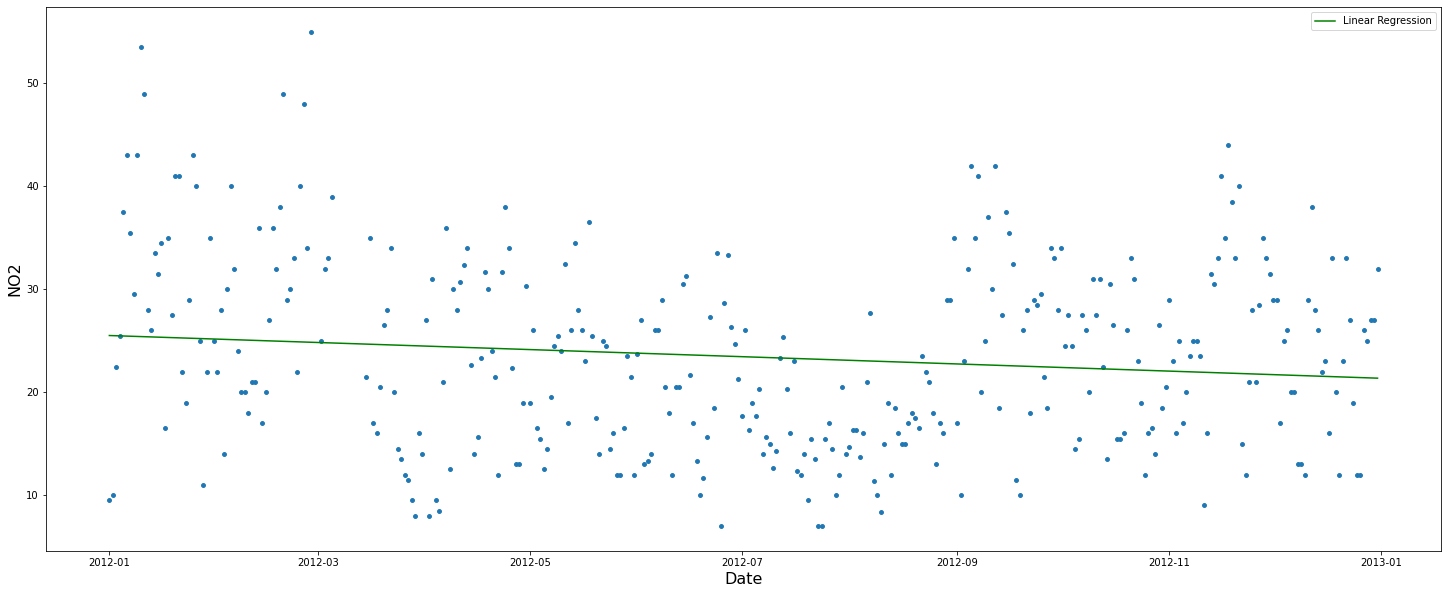

In [8]:
pd.DatetimeIndex(IllinoisDaily2012['Date Local'])
date = IllinoisDaily2012['Date Local']
N02 = IllinoisDaily2012['NO2 AQI']
IllinoisDaily2012 = pd.DataFrame({'time': date, 'NO2AQI': N02})
IllinoisDaily2012.time = pd.to_datetime(IllinoisDaily2012.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(IllinoisDaily2012.time.values.reshape(-1,1),IllinoisDaily2012.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(IllinoisDaily2012.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(IllinoisDaily2012.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(IllinoisDaily2012.time.values,IllinoisDaily2012.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [9]:
print('rmse for regression = > ', np.sqrt(mean_squared_error(N02,poly_pred)))

rmse for regression = >  9.037239880782002


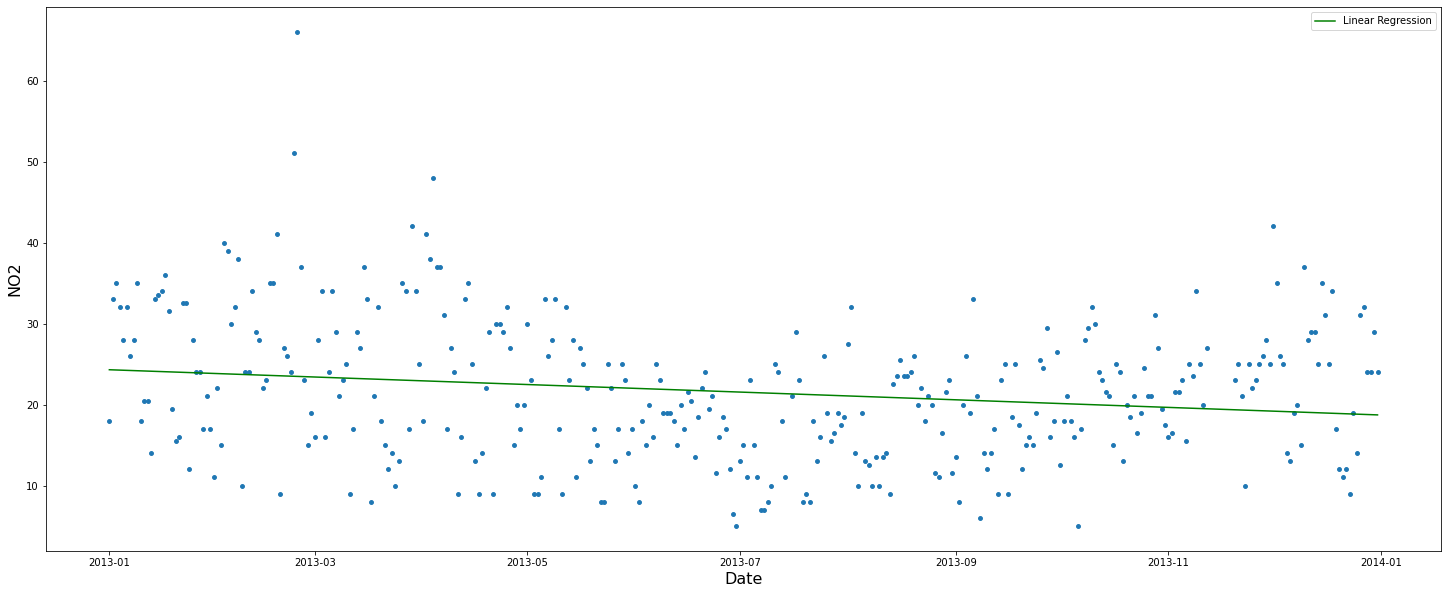

In [10]:
pd.DatetimeIndex(IllinoisDaily2013['Date Local'])
date = IllinoisDaily2013['Date Local']
N02 = IllinoisDaily2013['NO2 AQI']
IllinoisDaily2013 = pd.DataFrame({'time': date, 'NO2AQI': N02})
IllinoisDaily2013.time = pd.to_datetime(IllinoisDaily2013.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(IllinoisDaily2013.time.values.reshape(-1,1),IllinoisDaily2013.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(IllinoisDaily2013.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(IllinoisDaily2013.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(IllinoisDaily2013.time.values,IllinoisDaily2013.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [11]:
print('rmse for regression = > ', np.sqrt(mean_squared_error(N02,poly_pred)))

rmse for regression = >  8.49729519717777


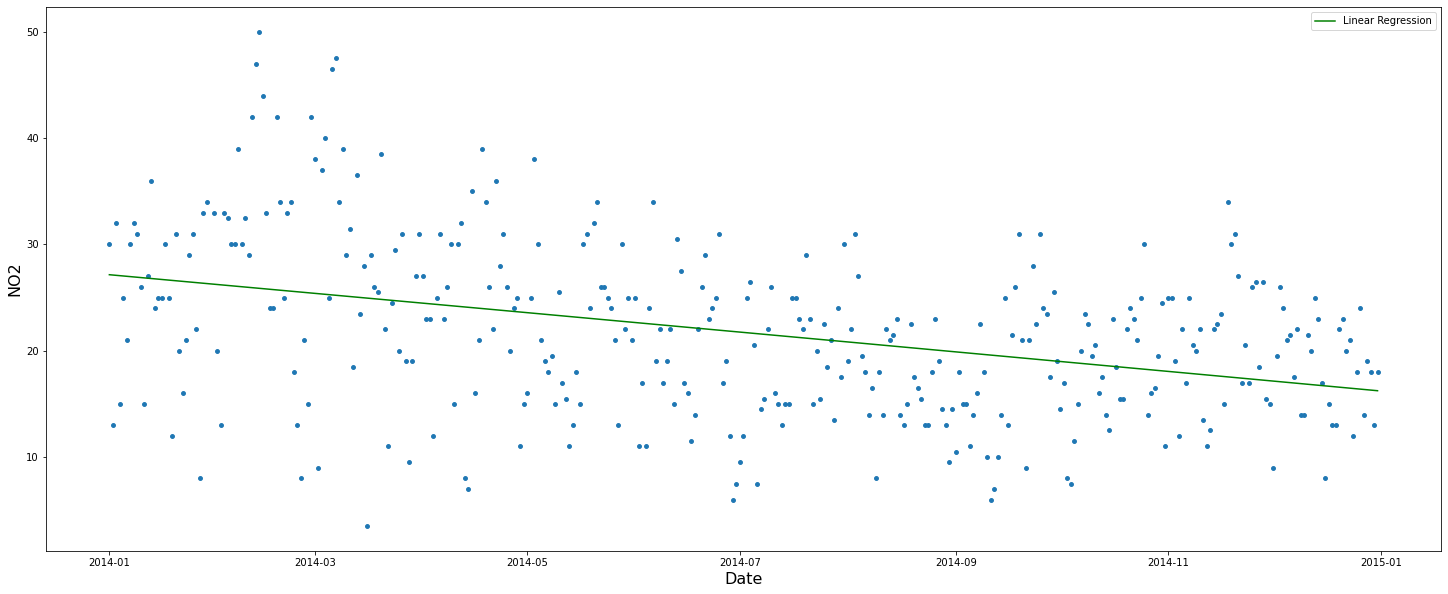

In [12]:
pd.DatetimeIndex(IllinoisDaily2014['Date Local'])
date = IllinoisDaily2014['Date Local']
N02 = IllinoisDaily2014['NO2 AQI']
IllinoisDaily2014 = pd.DataFrame({'time': date, 'NO2AQI': N02})
IllinoisDaily2014.time = pd.to_datetime(IllinoisDaily2014.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(IllinoisDaily2014.time.values.reshape(-1,1),IllinoisDaily2014.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(IllinoisDaily2014.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(IllinoisDaily2014.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(IllinoisDaily2014.time.values,IllinoisDaily2014.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [13]:
print('rmse for regression = > ', np.sqrt(mean_squared_error(N02,poly_pred)))

rmse for regression = >  7.48488311885951


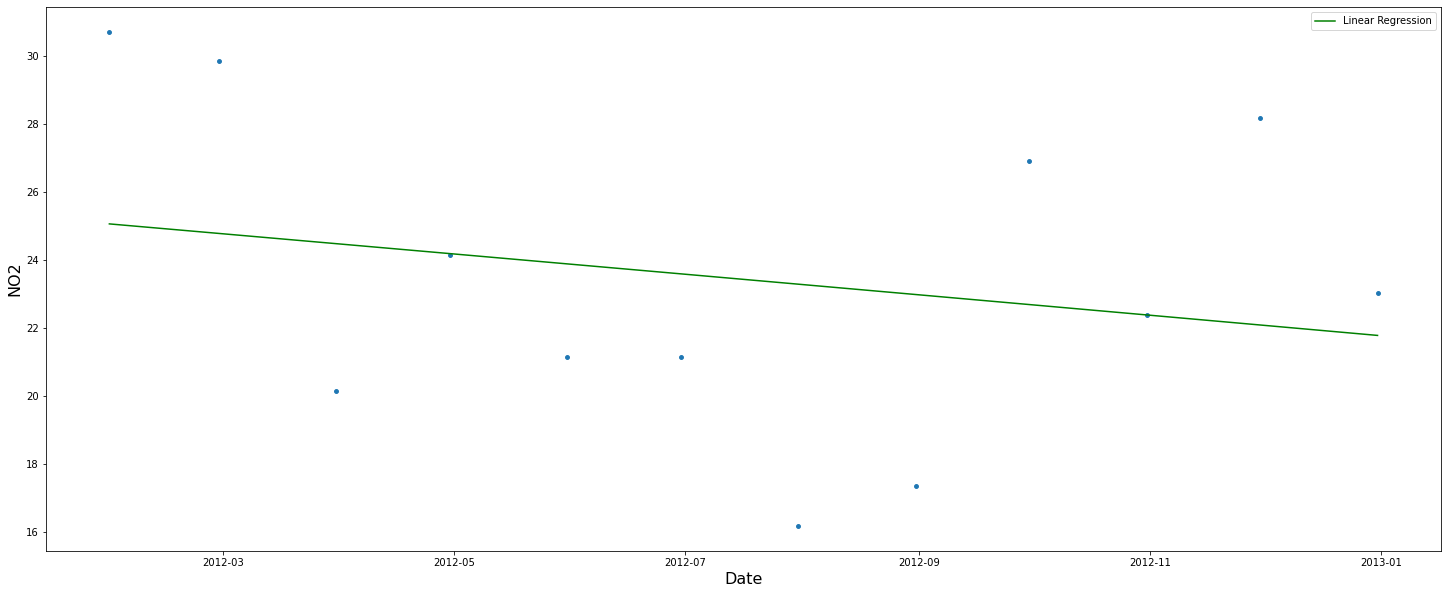

In [14]:
pd.DatetimeIndex(IllinoisMonthly2012['Date Local'])
date = IllinoisMonthly2012['Date Local']
N02 = IllinoisMonthly2012['NO2 AQI']
IllinoisMonthly2012 = pd.DataFrame({'time': date, 'NO2AQI': N02})
IllinoisMonthly2012.time = pd.to_datetime(IllinoisMonthly2012.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(IllinoisMonthly2012.time.values.reshape(-1,1),IllinoisMonthly2012.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(IllinoisMonthly2012.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(IllinoisMonthly2012.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(IllinoisMonthly2012.time.values,IllinoisMonthly2012.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [15]:
print('rmse for regression = > ', np.sqrt(mean_squared_error(N02,poly_pred)))

rmse for regression = >  4.366179408912617


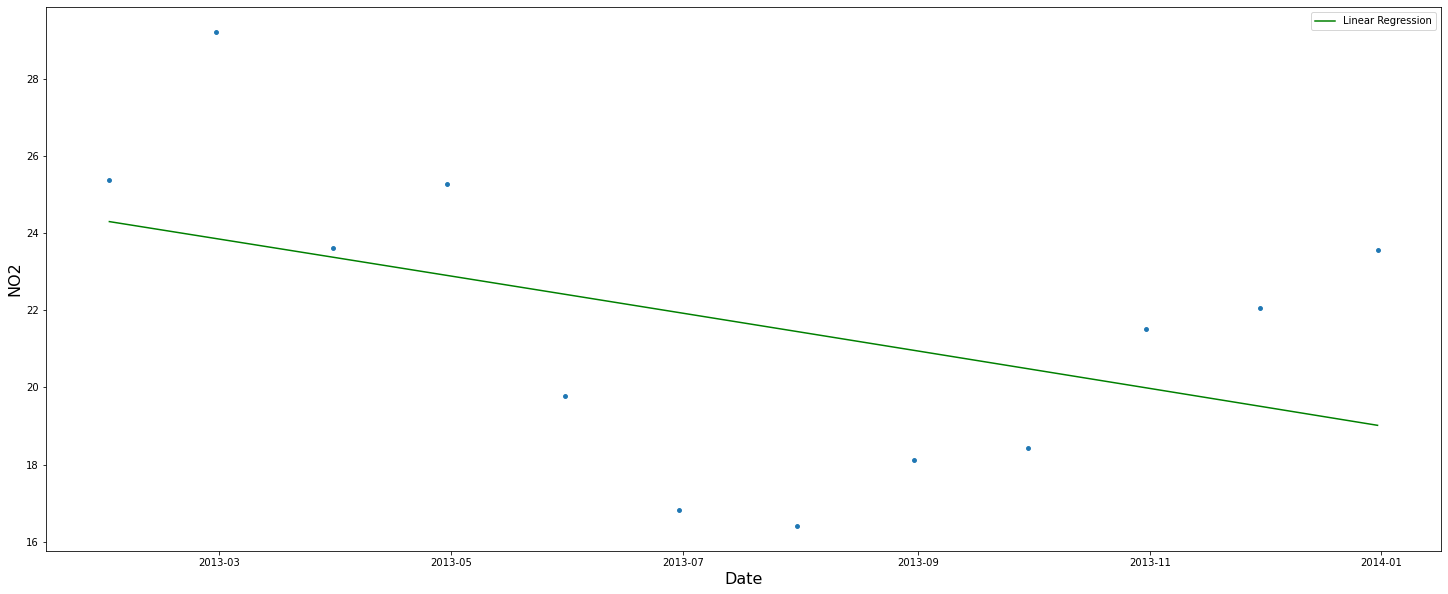

In [16]:
pd.DatetimeIndex(IllinoisMonthly2013['Date Local'])
date = IllinoisMonthly2013['Date Local']
N02 = IllinoisMonthly2013['NO2 AQI']
IllinoisMonthly2013 = pd.DataFrame({'time': date, 'NO2AQI': N02})
IllinoisMonthly2013.time = pd.to_datetime(IllinoisMonthly2013.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(IllinoisMonthly2013.time.values.reshape(-1,1),IllinoisMonthly2013.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(IllinoisMonthly2013.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(IllinoisMonthly2013.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(IllinoisMonthly2013.time.values,IllinoisMonthly2013.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [17]:
print('rmse for regression = > ', np.sqrt(mean_squared_error(N02,poly_pred)))

rmse for regression = >  3.3639551523661773


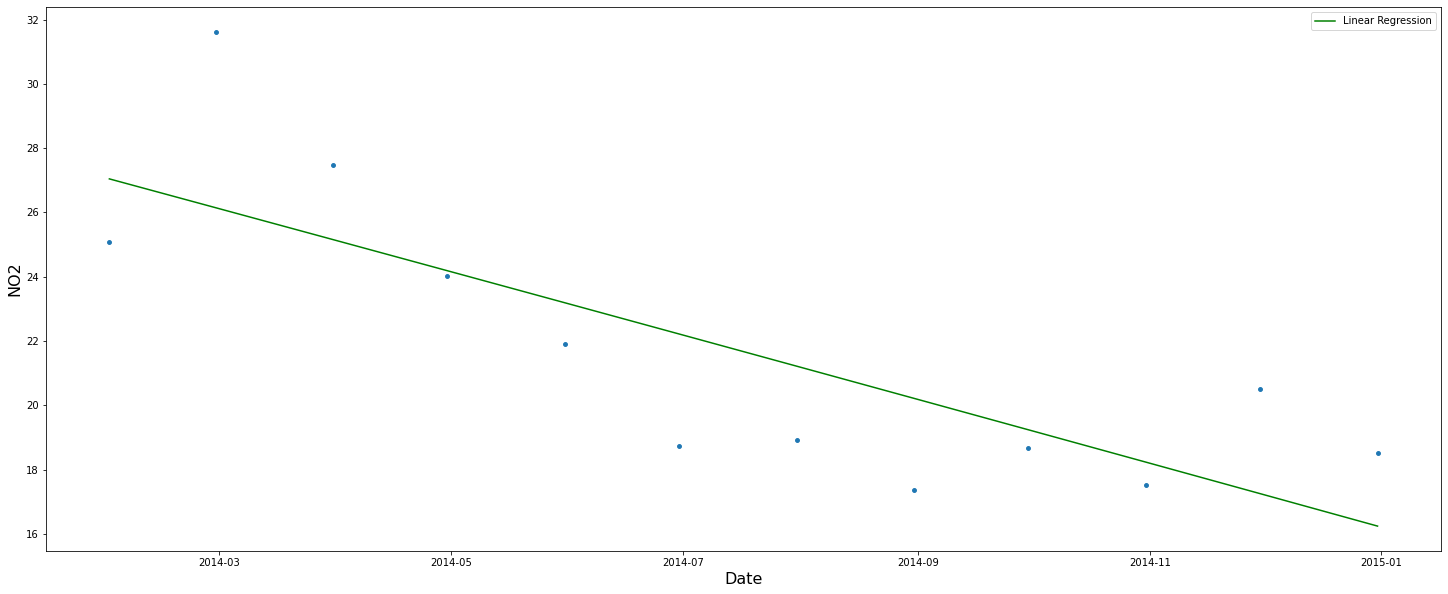

In [18]:
pd.DatetimeIndex(IllinoisMonthly2014['Date Local'])
date = IllinoisMonthly2014['Date Local']
N02 = IllinoisMonthly2014['NO2 AQI']
IllinoisMonthly2014 = pd.DataFrame({'time': date, 'NO2AQI': N02})
IllinoisMonthly2014.time = pd.to_datetime(IllinoisMonthly2014.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(IllinoisMonthly2014.time.values.reshape(-1,1),IllinoisMonthly2014.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(IllinoisMonthly2014.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(IllinoisMonthly2014.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(IllinoisMonthly2014.time.values,IllinoisMonthly2014.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [19]:
print('rmse for regression = > ', np.sqrt(mean_squared_error(N02,poly_pred)))

rmse for regression = >  2.6279535895534467


In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
IllinoisDaily2014

,time,NO2AQI
0,2014-01-01,30.0
1,2014-01-02,13.0
2,2014-01-03,32.0
3,2014-01-04,15.0
4,2014-01-05,25.0
...,...,...
359,2014-12-27,14.0
360,2014-12-28,19.0
361,2014-12-29,18.0
362,2014-12-30,13.0


In [22]:
x = IllinoisDaily2014['time']
y = IllinoisDaily2014['NO2AQI']
x = IllinoisDaily2014.iloc[:,0:1]
y = IllinoisDaily2014.iloc[:,1:2]

In [23]:
x

,time
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
359,2014-12-27
360,2014-12-28
361,2014-12-29
362,2014-12-30


In [24]:
x

,time
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
359,2014-12-27
360,2014-12-28
361,2014-12-29
362,2014-12-30


In [25]:
model = LinearRegression()


In [26]:
x

,time
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
359,2014-12-27
360,2014-12-28
361,2014-12-29
362,2014-12-30


In [27]:
x.columns = ["time"]
x['time'] = pd.to_datetime(x['time'])
x['time']=x['time'].map(dt.datetime.toordinal)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
#x = IllinoisMonthly2014['time']
#y = IllinoisMonthly2014['NO2AQI']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
print(model.coef_)

[[-0.02609749]]


In [31]:
print(model.intercept_)

[19213.95598229]


In [32]:
x

,time
0,735234
1,735235
2,735236
3,735237
4,735238
...,...
359,735594
360,735595
361,735596
362,735597


In [33]:
y

,NO2AQI
0,30.0
1,13.0
2,32.0
3,15.0
4,25.0
...,...
359,14.0
360,19.0
361,18.0
362,13.0


In [34]:
ordinal = 735234;

date = datetime.date.fromordinal(ordinal);

print("New year 2020 from ordinal %d:%s"%(ordinal, date));

NameError: name 'datetime' is not defined

In [35]:
x_test

,time
177,735412
150,735385
180,735415
316,735551
362,735597
...,...
120,735355
203,735438
233,735468
75,735310


In [36]:
predictions = model.predict(x_test)

In [37]:
from sklearn import metrics

In [38]:
metrics.mean_absolute_error(y_test,predictions)

6.365745022983934

In [39]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.019231459768474

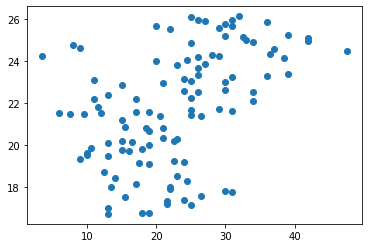

In [40]:
plt.scatter(y_test,predictions)

In [41]:
accuracy = model.score(x_test,y_test)

In [42]:
accuracy

0.17416835574277323

In [43]:
y_test

,NO2AQI
177,12.0
150,25.0
180,9.5
316,22.0
362,13.0
...,...
120,25.0
203,15.5
233,13.0
75,26.0
